# Post Gradauate Diploma in Supply Chain Analytics - Data Analytics and Visualisation

### Introduction

This project has explored a Retail Transactional Dataset - Exploring Insights into Consumer Behavior and Operations in Retail Transactions

### Step 1 - Import the required libraries:

Here I will import the required libraries that will serve as tools for performing the various parts of the project.

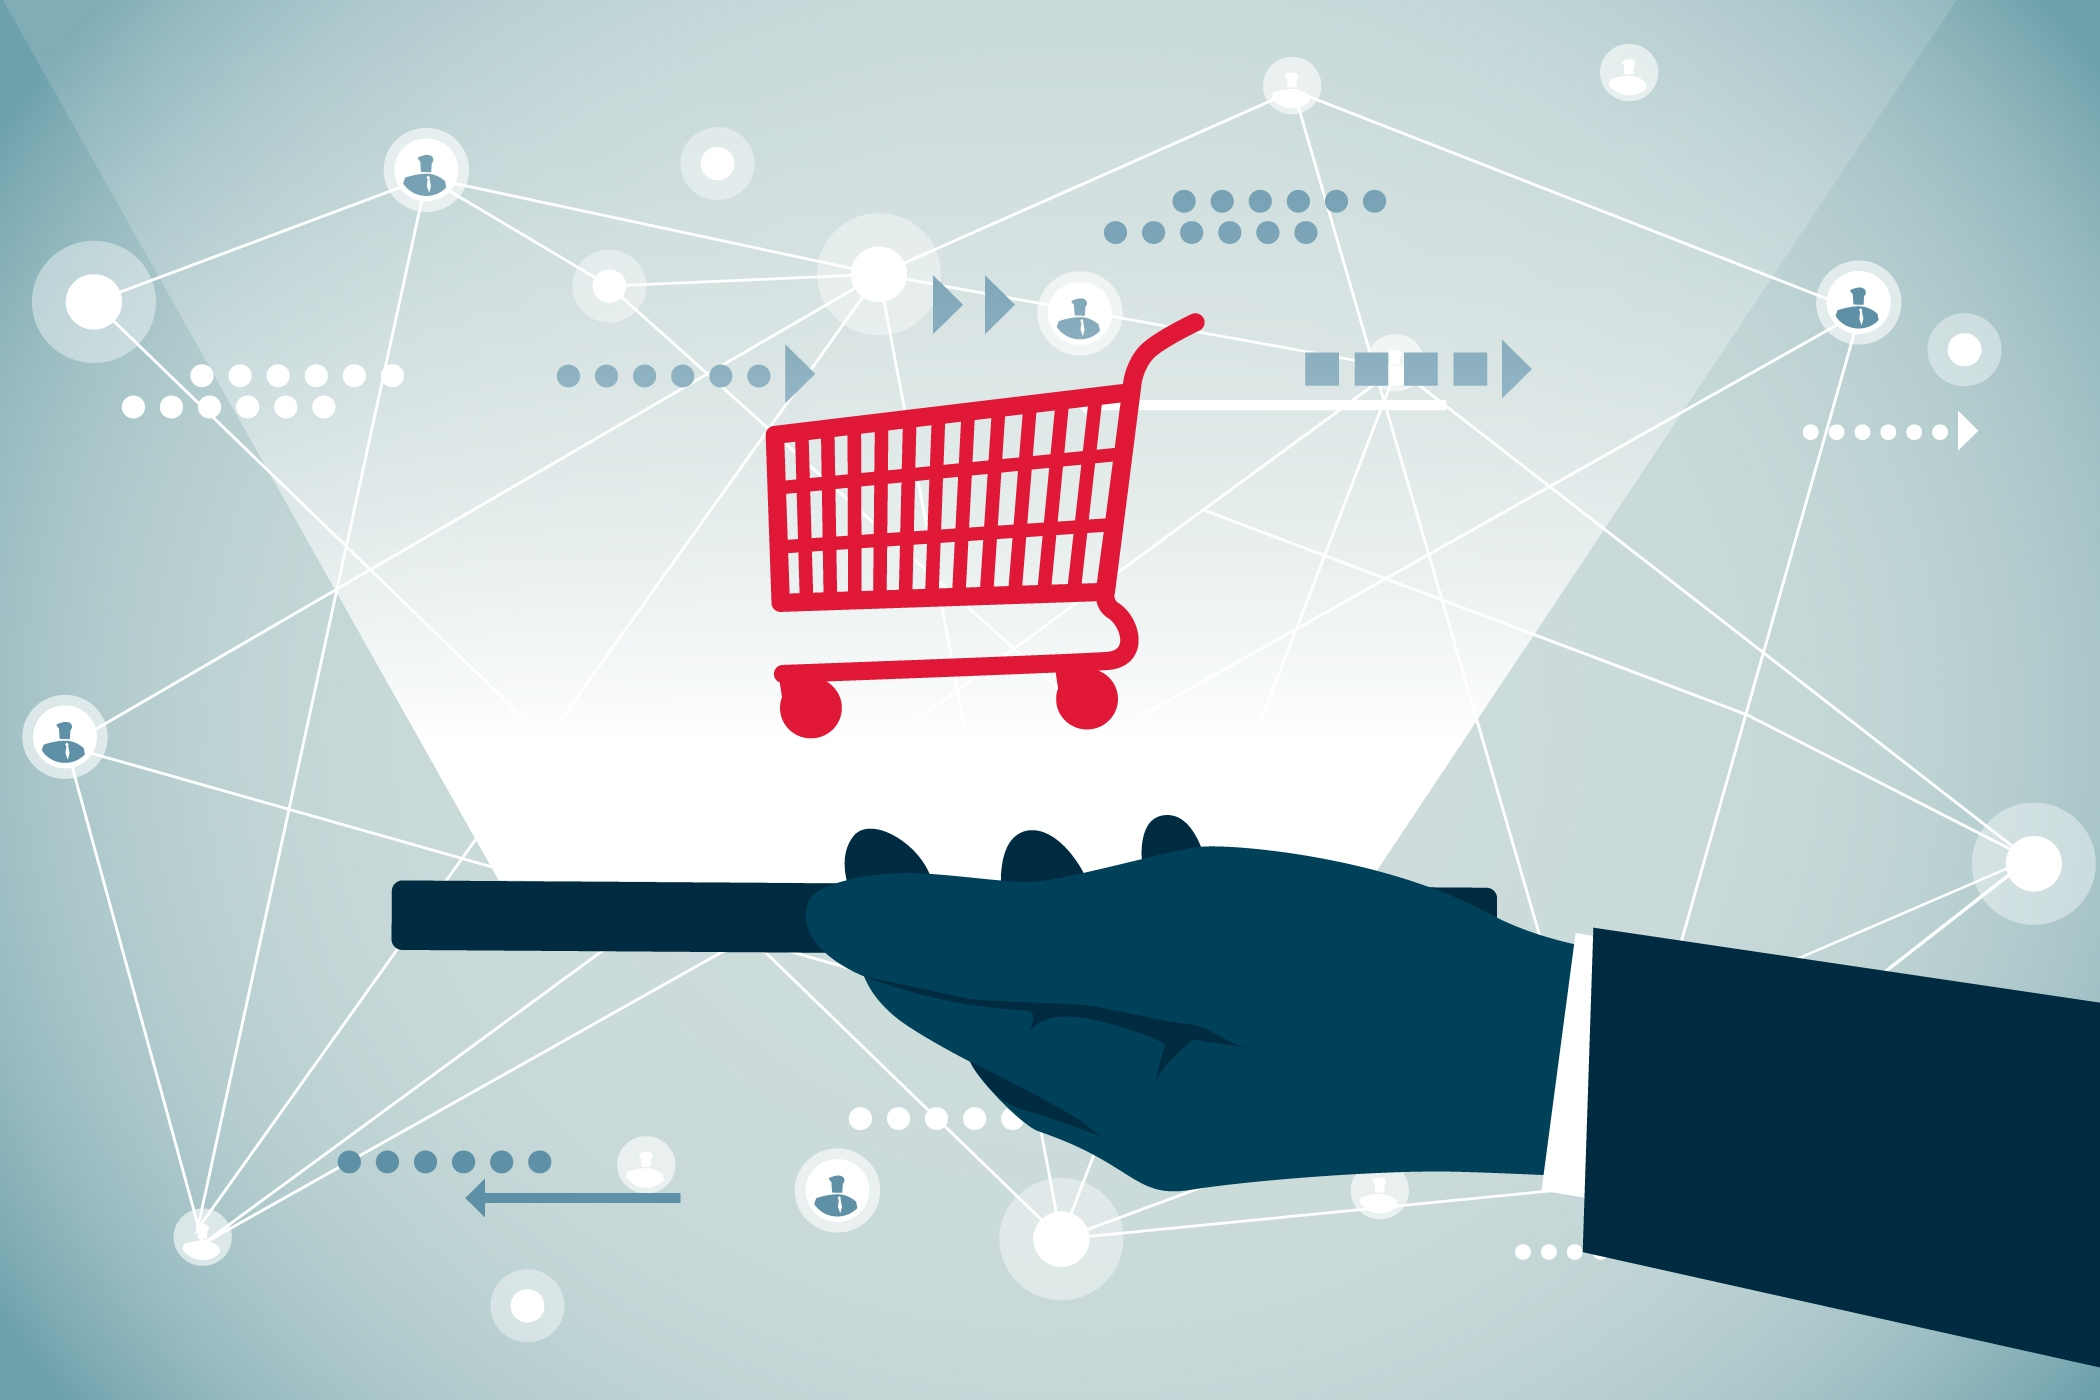

In [1]:
import pandas as pd # library used for working with data sets.
import numpy as np # librayr will be used to perform a wide variety of mathematical operations on arrays.
import matplotlib.pyplot as plt # for plotting and visuals
import seaborn as sns # used for visualisation

from IPython.display import Image, display

# Replace 'retail1.jpg' with the path to your image file if it's not in the same directory
image_path = 'retail1.jpeg'

# Display the image
display(Image(filename=image_path))

############################
#pip install pandas plotly geopy

import plotly.express as px
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter




############################

# The create sample data:
from numpy.random import seed
from numpy.random import normal

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import sklearn.neighbors as nei
from sklearn.neighbors import KNeighborsClassifier
import pickle
from collections import defaultdict
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

### Step 2 - Import the dataset:

Retail Transactional Dataset: Exploring Insights into Consumer Behavior and Operations in Retail Transactions.

Dataset has been sourced from Kaggle, description as follows is from the webpage on kaggle:

"Certainly! The dataset you're referring to contains detailed information about retail transactions, aimed at providing a comprehensive view of customer behavior and purchasing patterns. Here’s a breakdown of the various attributes and what they entail"

Found at:
https://www.kaggle.com/datasets/bhavikjikadara/retail-transactional-dataset?resource=download

In [2]:
# Import dataset which is a CSV file and give it a variable name of 'df'

df = pd.read_csv('retail_data.csv')

### Step 3  - Explore the data:

In [3]:
# read the top/head of the dataset, get a quick view of what is in the dataset

df.head()

Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 Amanda Burgs    Dortmund           Berlin   
1  6.852900e+09           82072 Dawn Centers  Nottingham          England   
2  8.362160e+09            4133 Young Canyon     Geelong  New South Wales   
3  2.776752e+09  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4  9.098268e+09    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country  ...  Total_Amount Product_Category  Product_Brand  \
0  77985.0    Germany  ...    324.086270         Clothing           Nike   
1  99071.0         UK  ...    806.707815      Electronics        Samsung   
2  75929.0  Australia  ...   1063.432799            Books  Penguin Books   
3  88420.0     Canada  ...   2466.854021       Home Decor     Home Depot   
4  48704.0         UK  ...    248.553049          Grocery         Nestle   

  Product_Type   Feedback  Shipping_Method Payment_Method Order_Status  \
0       Shorts  Excellent         Same-Day     Debit Card      Shipped   
1       Tablet  Excellent         Standard    Credit Card   Processing   
2   Children's    Average         Same-Day    Credit Card   Processing   
3        Tools  Excellent         Standard         PayPal   Processing   
4    Chocolate        Bad         Standard           Cash      Shipped   

   Ratings           products  
0      5.0     Cycling shorts  
1      4.0         Lenovo Tab  
2      2.0   Sports equipment  
3      4.0      Utility knife  
4      1.0  Chocolate cookies  

[5 rows x 30 columns]

In [4]:
# Same with reviewing the bottom couple of rows in the dataset

df.tail()

Transaction_ID  Customer_ID            Name                     Email  \
302005       4246475.0      12104.0    Meagan Ellis      Courtney60@gmail.com   
302006       1197603.0      69772.0     Mathew Beck      Jennifer71@gmail.com   
302007       7743242.0      28449.0      Daniel Lee  Christopher100@gmail.com   
302008       9301950.0      45477.0  Patrick Wilson       Rebecca65@gmail.com   
302009       2882826.0      53626.0  Dustin Merritt       William14@gmail.com   

               Phone                       Address        City  \
302005  7.466354e+09        389 Todd Path Apt. 159  Townsville   
302006  5.754305e+09             52809 Mark Forges     Hanover   
302007  9.382530e+09  407 Aaron Crossing Suite 495    Brighton   
302008  9.373222e+09               3204 Baird Port     Halifax   
302009  9.518927e+09           143 Amanda Crescent      Tucson   

                  State  Zipcode    Country  ...  Total_Amount  \
302005  New South Wales   4567.0  Australia  ...    973.962984   
302006           Berlin  16852.0    Germany  ...    285.137301   
302007          England  88038.0         UK  ...    182.105285   
302008          Ontario  67608.0     Canada  ...    120.834784   
302009    West Virginia  25242.0        USA  ...   2382.233417   

       Product_Category  Product_Brand Product_Type   Feedback  \
302005            Books  Penguin Books      Fiction        Bad   
302006      Electronics          Apple       Laptop  Excellent   
302007         Clothing         Adidas       Jacket    Average   
302008       Home Decor           IKEA    Furniture       Good   
302009       Home Decor     Home Depot  Decorations    Average   

        Shipping_Method Payment_Method Order_Status  Ratings  \
302005         Same-Day           Cash   Processing      1.0   
302006         Same-Day           Cash   Processing      5.0   
302007          Express           Cash      Shipped      2.0   
302008         Standard           Cash      Shipped      4.0   
302009         Same-Day           Cash      Shipped      2.0   

                  products  
302005  Historical fiction  
302006             LG Gram  
302007               Parka  
302008            TV stand  
302009              Clocks  

[5 rows x 30 columns]

In [5]:
# Quick statistical analysis on the df, summary statistics
df.describe()

Transaction_ID    Customer_ID         Phone        Zipcode  \
count    3.016770e+05  301702.000000  3.016480e+05  301670.000000   
mean     5.495823e+06   55006.553934  5.501464e+09   50298.951019   
std      2.595565e+06   26005.675200  2.596017e+09   28972.807134   
min      1.000007e+06   10000.000000  1.000049e+09     501.000000   
25%      3.247930e+06   32469.250000  3.255061e+09   25425.000000   
50%      5.499657e+06   55012.000000  5.505812e+09   50602.500000   
75%      7.739509e+06   77511.000000  7.749860e+09   75252.000000   
max      9.999995e+06   99999.000000  9.999996e+09   99949.000000   

                 Age           Year  Total_Purchases         Amount  \
count  301837.000000  301660.000000    301649.000000  301653.000000   
mean       35.481326    2023.165113         5.359729     255.163659   
std        15.021933       0.371283         2.868575     141.389640   
min        18.000000    2023.000000         1.000000      10.000219   
25%        22.000000    2023.000000         3.000000     132.890764   
50%        32.000000    2023.000000         5.000000     255.470969   
75%        46.000000    2023.000000         8.000000     377.672606   
max        70.000000    2024.000000        10.000000     499.997911   

        Total_Amount        Ratings  
count  301660.000000  301826.000000  
mean     1367.651156       3.162670  
std      1128.998515       1.320827  
min        10.003750       1.000000  
25%       438.724278       2.000000  
50%      1041.117547       3.000000  
75%      2029.999853       4.000000  
max      4999.625796       5.000000

In [6]:
# Check for any null values. Please note, the nature of this dataset will inevitably have null values but adding in this line to demonstrate ability to review the dataset.
df.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [7]:
# Check the datatypes:

print(df.dtypes)

Transaction_ID      float64
Customer_ID         float64
Name                 object
Email                object
Phone               float64
Address              object
City                 object
State                object
Zipcode             float64
Country              object
Age                 float64
Gender               object
Income               object
Customer_Segment     object
Date                 object
Year                float64
Month                object
Time                 object
Total_Purchases     float64
Amount              float64
Total_Amount        float64
Product_Category     object
Product_Brand        object
Product_Type         object
Feedback             object
Shipping_Method      object
Payment_Method       object
Order_Status         object
Ratings             float64
products             object
dtype: object


In [8]:
# Check shape of dataset, it has c.300k rows and 30 columns

print (df.shape)

(302010, 30)


In [9]:
# Continuing to look at the dataset, checking column headings

df.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [10]:
# Another option to explore the dataset, this would be my preferred method as it give more detail on the dataset than other methods.

# It shows the number of rows, columns like df.shape but also gives the data type and null columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

### Step 3  - Data cleaning:

In [11]:
# I want to amend the date data type and amend it to datetime.

df.Date = pd.to_datetime(df.Date)

In [12]:
# I will also amend the datatype for gender and product category.

df.Gender = df.Gender.astype('category')
df.Product_Category = df.Product_Category.astype('category')

In [13]:
# Check the datatypes again to ensure changes have been made:

print(df.dtypes)

Transaction_ID             float64
Customer_ID                float64
Name                        object
Email                       object
Phone                      float64
Address                     object
City                        object
State                       object
Zipcode                    float64
Country                     object
Age                        float64
Gender                    category
Income                      object
Customer_Segment            object
Date                datetime64[ns]
Year                       float64
Month                       object
Time                        object
Total_Purchases            float64
Amount                     float64
Total_Amount               float64
Product_Category          category
Product_Brand               object
Product_Type                object
Feedback                    object
Shipping_Method             object
Payment_Method              object
Order_Status                object
Ratings             

In [14]:
# One final look at the data

df

Transaction_ID  Customer_ID                 Name  \
0            8691788.0      37249.0  Michelle Harrington   
1            2174773.0      69749.0          Kelsey Hill   
2            6679610.0      30192.0         Scott Jensen   
3            7232460.0      62101.0        Joseph Miller   
4            4983775.0      27901.0        Debra Coleman   
...                ...          ...                  ...   
302005       4246475.0      12104.0         Meagan Ellis   
302006       1197603.0      69772.0          Mathew Beck   
302007       7743242.0      28449.0           Daniel Lee   
302008       9301950.0      45477.0       Patrick Wilson   
302009       2882826.0      53626.0       Dustin Merritt   

                           Email         Phone                       Address  \
0              Ebony39@gmail.com  1.414787e+09             3959 Amanda Burgs   
1               Mark36@gmail.com  6.852900e+09            82072 Dawn Centers   
2              Shane85@gmail.com  8.362160e+09             4133 Young Canyon   
3               Mary34@gmail.com  2.776752e+09   8148 Thomas Creek Suite 100   
4            Charles30@gmail.com  9.098268e+09     5813 Lori Ports Suite 269   
...                          ...           ...                           ...   
302005      Courtney60@gmail.com  7.466354e+09        389 Todd Path Apt. 159   
302006      Jennifer71@gmail.com  5.754305e+09             52809 Mark Forges   
302007  Christopher100@gmail.com  9.382530e+09  407 Aaron Crossing Suite 495   
302008       Rebecca65@gmail.com  9.373222e+09               3204 Baird Port   
302009       William14@gmail.com  9.518927e+09           143 Amanda Crescent   

              City            State  Zipcode    Country  ...  Total_Amount  \
0         Dortmund           Berlin  77985.0    Germany  ...    324.086270   
1       Nottingham          England  99071.0         UK  ...    806.707815   
2          Geelong  New South Wales  75929.0  Australia  ...   1063.432799   
3         Edmonton          Ontario  88420.0     Canada  ...   2466.854021   
4          Bristol          England  48704.0         UK  ...    248.553049   
...            ...              ...      ...        ...  ...           ...   
302005  Townsville  New South Wales   4567.0  Australia  ...    973.962984   
302006     Hanover           Berlin  16852.0    Germany  ...    285.137301   
302007    Brighton          England  88038.0         UK  ...    182.105285   
302008     Halifax          Ontario  67608.0     Canada  ...    120.834784   
302009      Tucson    West Virginia  25242.0        USA  ...   2382.233417   

       Product_Category  Product_Brand Product_Type   Feedback  \
0              Clothing           Nike       Shorts  Excellent   
1           Electronics        Samsung       Tablet  Excellent   
2                 Books  Penguin Books   Children's    Average   
3            Home Decor     Home Depot        Tools  Excellent   
4               Grocery         Nestle    Chocolate        Bad   
...                 ...            ...          ...        ...   
302005            Books  Penguin Books      Fiction        Bad   
302006      Electronics          Apple       Laptop  Excellent   
302007         Clothing         Adidas       Jacket    Average   
302008       Home Decor           IKEA    Furniture       Good   
302009       Home Decor     Home Depot  Decorations    Average   

        Shipping_Method Payment_Method Order_Status  Ratings  \
0              Same-Day     Debit Card      Shipped      5.0   
1              Standard    Credit Card   Processing      4.0   
2              Same-Day    Credit Card   Processing      2.0   
3              Standard         PayPal   Processing      4.0   
4              Standard           Cash      Shipped      1.0   
...                 ...            ...          ...      ...   
302005         Same-Day           Cash   Processing      1.0   
302006         Same-Day           Cash   Processing      5.0   
302007          Expr

### Step 4  - Analysis:

In [15]:
# Just having a look at the date column information

df['Date']

0        2023-09-18
1        2023-12-31
2        2023-04-26
3        2023-05-08
4        2024-01-10
            ...    
302005   2024-01-20
302006   2023-12-28
302007   2024-02-27
302008   2023-09-03
302009   2024-01-08
Name: Date, Length: 302010, dtype: datetime64[ns]

In [16]:
# You can see that the earliest transaction made was 1st of March 2023 and the latest transaction was 29th of February 2024.

min(df.Date), max(df.Date)

(Timestamp('2023-03-01 00:00:00'), Timestamp('2024-02-29 00:00:00'))

In [17]:
# Creating a new varriable (date, with lower case d) and converting the date column to str in order to gain some insights.

date1 = df.Date.astype(str)

In [18]:
year = date1.str[:4]

In [19]:
year.head()

0    2023
1    2023
2    2023
3    2023
4    2024
Name: Date, dtype: object

In [20]:
# This can give you the span of the data, this would be much more usefull on a larger dataset spanning a greater amount of time.

year.unique()

array(['2023', '2024', 'NaT'], dtype=object)

In [21]:
# I want to extract the month values from the dataset, returning an integer from the [5:7]

def extract_month(date_str):
    if pd.isnull(date_str) or len(date_str) < 7:
        return None
    return int(date_str[5:7])

# Apply the function to extract month
month = date1.apply(extract_month)

print(month)

0          9.0
1         12.0
2          4.0
3          5.0
4          1.0
          ... 
302005     1.0
302006    12.0
302007     2.0
302008     9.0
302009     1.0
Name: Date, Length: 302010, dtype: float64


In [22]:
# Creating a dictionary taht indicates what the month values represent.

month_dictionary = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July',
              8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

In [23]:
# Continued, replacing the vaules with the month name.

month.replace(month_dictionary, inplace= True)

In [24]:
month.unique()

array(['September', 'December', 'April', 'May', 'January', 'June',
       'March', 'October', 'July', 'November', 'February', 'August', nan],
      dtype=object)

In [25]:
month.describe()

count      301651
unique         12
top       January
freq        25635
Name: Date, dtype: object

In [26]:
# Get the value counts
value_counts = month.value_counts()

# Defining  custom sort order
custom_sort = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
               'October', 'November', 'December']

# Sort the value counts based on the custom order
sorted_month_counts = value_counts.loc[custom_sort]

In [27]:
# January is the busiest month, February is the quietest

sorted_month_counts.to_frame()

Date
January    25635
February   24165
March      25611
April      24719
May        25236
June       24798
July       25523
August     25520
September  24863
October    25584
November   24653
December   25344

In [32]:
# Calculate the mean of the Total_Purchases column
mean_Total_Purchases = df['Total_Purchases'].mean()

# Print the result
print("Mean of Total_Purchases:", mean_Total_Purchases)

Mean of Total_Purchases: 5.359729354315777


In [33]:
# I also want to get the mean of the Ratings column
mean_Ratings = df['Ratings'].mean()

# Print the result
print("Mean of Ratings:", mean_Ratings)

Mean of Ratings: 3.1626698826476183


### Step 3  - Visualisation:

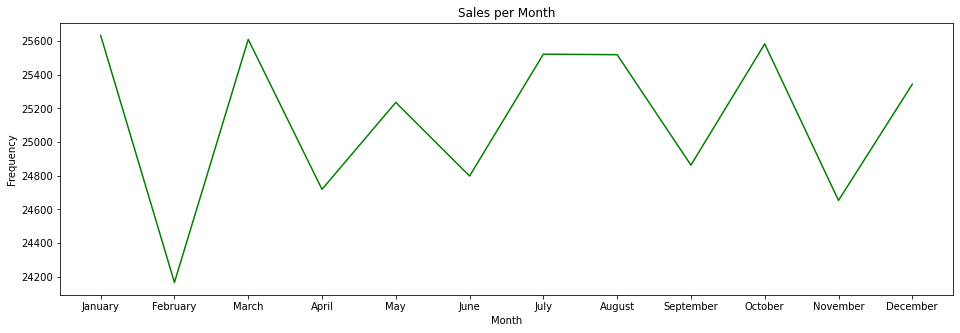

In [46]:
# Plotting Sales per month

plt.figure(figsize=(16,5))


plt.plot(sorted_month_counts.index, sorted_month_counts.values, color = 'green')
# Customize the plot
plt.ylabel('Frequency')
plt.xlabel('Month')
plt.title('Sales per Month')

plt.show()

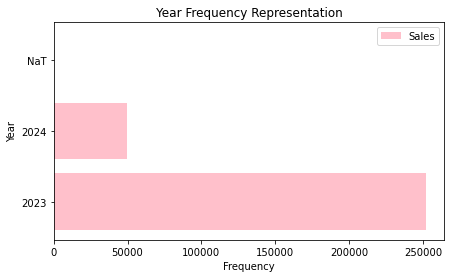

In [45]:
plt.figure(figsize=(7,4))
value_counts = year.value_counts()

plt.barh(value_counts.index, value_counts.values, label='Sales', color= 'pink')
# Customize the plot
plt.ylabel('Year')
plt.xlabel('Frequency')
plt.title('Year Frequency Representation')

plt.legend()
plt.show()

### References:

[01] Plotly: https://plotly.com/python/bubble-maps/#:~:text=Bubble%20map%20with%20Plotly%20Express,-Plotly%20Express%20is&text=With%20px.,gives%20the%20size%20of%20markers.
[02]